<h1>Interpolacija</h1>
<h2>Lagranzev interpolacioni polinom</h2>


$L_n(x) = \sum_{i=0}^{n} p_i(x) \cdot y_i$ $$$$ 
$p_i(x) = \frac{(x-x_0)(x-x_1) \cdot \cdot \cdot (x-x_{i-1})(x-x_{i+1}) \cdot \cdot \cdot (x-x_n)}{(x_i-x_0)(x_i-x_1)\cdot \cdot \cdot(x_i-x_{i-1})(x_i-x_{i+1}) \cdot \cdot \cdot (x_i-x_n)}$




In [37]:
def lagranz(x, X, Y):
    s = 0
    for i in range(len(X)):
        p = 1
        for k in range(len(X)):
            if k != i:
                p = p*(x-X[k])/(X[i]-X[k])
        s += p * Y[i]
    return s

X = [1, 3, 5, 7, 9]
Y = [1, 9, 25, 49, 81]

print (lagranz(2, X, Y))

4.0


<h2>Primer</h2>

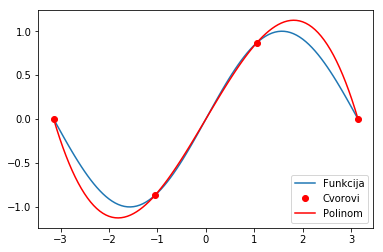

In [3]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

cvorovi = np.linspace(-np.pi, np.pi, 4)
vr = np.sin(cvorovi)

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

p = lagrange(cvorovi, vr)

#plot funkcije
plt.plot(x, y, label="Funkcija")
#plot cvorova
plt.plot(cvorovi, np.polyval(p, cvorovi), 'ro', label="Cvorovi")
#plot polinoma
plt.plot(x, np.polyval(p, x), 'r-', label="Polinom")

plt.legend(loc='lower right')

plt.show()

<h2>Tacnost necemo povecati ukoliko povecamo broj cvorova!</h2>

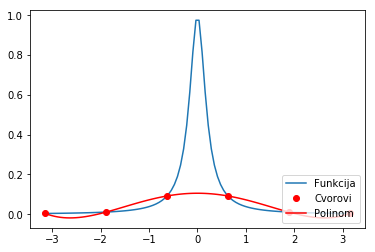

In [44]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

brCvorova = 6
cvorovi = np.linspace(-np.pi, np.pi, brCvorova)
vr = 1.0/(1+25*np.array([x**2 for x in cvorovi]))

x = np.linspace(-np.pi, np.pi, 100)
y = 1.0/(1+25*np.array([i**2 for i in x]))

p = lagrange(cvorovi, vr)

#plot funkcije
plt.plot(x, y, label="Funkcija")
#plot cvorova
plt.plot(cvorovi, np.polyval(p, cvorovi), 'ro', label="Cvorovi")
#plot polinoma
plt.plot(x, np.polyval(p, x), 'r-', label="Polinom")

plt.legend(loc='lower right')

plt.show()

<h2> I Njutnov interpolacioni polinom (konacne razlike)</h2>

Koristimo ga za ekvidistantne cvorove!

$N_n(x) = y_0 + \frac{\Delta y_0}{1!h}(x-x_0) + \frac{\Delta^2 y_0}{2!h^2}(x-x_0)(x-x_1) + ... + \frac{\Delta^n y_0}{n!h^n}(x-x_0)(x-x_1)\cdot \cdot \cdot (x-x_{n-1})$

Ako uvedemo smenu:

$\frac{x-x_0}{h} = u$
ili
$x = x_0 + h\cdot u$ $$$$
Dobicemo: 

$N_n(x_0 + h*u) = N_n(u) = y_0 + \frac{\Delta y_0}{1!}u + \frac{\Delta^2 y_0}{2!}u(u-1) + ... + \frac{\Delta^n y_0}{n!}u(u-1)\cdot \cdot \cdot(u-n+1)\cdot \cdot \cdot (x-x_{n-1})$

In [116]:
import numpy as np
import math

def konacneRazlike(Y):
    n = len(Y)
    tabk = np.zeros((n-1, n-1));
    kon = Y
    
    for i in range(n-1):
        kon = np.diff(kon) 
        tabk[:n-i-1,i] = kon
    return tabk

def njutnIkonacne(x, X, Y):
    tabk = konacneRazlike(Y)

    h = X[1]-X[0]
    u = (x-X[0])/h;

    p = 1;
    y = F[0];
    for i in range (n-1):
        p = p * (u - i)
        y = y + p*tabk[0,i] / math.factorial(i+1)
    return y

X = [0.0, 1.0, 2.0, 3.0, 4.0]
F = [2.0, 2.08008, 2.15443, 2.22398, 2.28943]

#X = [1, 3, 5, 7, 9]
#F = [1, 9, 25, 49, 81]


print (njutnIkonacne(0.5, X, F))

2.040823359375


<h2> II Njutnov interpolacioni polinom (konacne razlike)</h2>
Koristimo ga za ekvidistantne cvorove!

$N_n(x) = y_n + \frac{\Delta y_{n-1}}{1!h}(x-x_n) + \frac{\Delta^2 y_{n-2}}{2!h^2}(x-x_n)(x-x_{n-1}) + ... + \frac{\Delta^n y_0}{n!h^n}(x-x_n)(x-x_{n-1})\cdot \cdot \cdot (x-x_1)$

Uvodjenjem smene:

$\frac{x-x_n}{h} = u$
ili
$x = x_n + h\cdot u$ $$$$
Dobicemo: 

$N_n(x_0 + h*u) = N_n(u) = y_n + \frac{\Delta y_{n-1}}{1!}u + \frac{\Delta^2 y_{n-2}}{2!}u(u+1) + ... + \frac{\Delta^n y_0}{n!}u(u+1)\cdot \cdot \cdot (u+n-1)$

In [143]:
import numpy as np
import math

def konacneRazlike(Y):
    n = len(Y)
    tabk = np.zeros((n-1, n-1));
    kon = Y
    
    for i in range(n-1):
        kon = np.diff(kon) 
        tabk[:n-i-1,i] = kon
    return tabk

def njutnIIkonacne(x, X, Y):
    n = len(Y)
    tabk = konacneRazlike(Y)

    h = X[1]-X[0]
    u = (x-X[n-1])/h;
    
    p = 1;
    y = F[n-1];
    for i in range (n-1):
        p = p * (u + i)
        y = y + p*tabk[n-2-i,i] / math.factorial(i+1)
    return y

#X = [0.0, 0.5, 1.0, 1.5, 2.0]
#F = [3.00000, 4.25000, 6.00000, 8.25000, 11.00000]

X = [1, 3, 5, 7, 9]
F = [1, 9, 25, 49, 81]

print (njutnIIkonacne(8, X, F))

64.0


<h2>Njutnov interpolacioni polinom (podeljene razlike)</h2>

4
